In [136]:
from sklearn.datasets import make_regression
import seaborn as sns 
import matplotlib.pyplot as plt 

import pandas as pd
import numpy as np 
model_name = ''
from sklearn.linear_model import (LinearRegression, 
                                  Ridge, 
                                  Lasso)
from sklearn.model_selection import cross_validate

from sklearn.model_selection import RepeatedKFold



models = {"LinearRegression":LinearRegression(),
         "Ridge_aplpha_.25":Ridge(alpha=0.25),
          "Ridge_aplpha_.5":Ridge(alpha=.5),
          "Ridge_aplpha_.75":Ridge(alpha=.75),
          "Ridge_aplpha_1":Ridge(alpha=1),
          "Lasso_alpha_.25":Lasso(alpha=.25),
          "Lasso_alpha_.5":Lasso(alpha=.5),
          "Lasso_alpha_.75":Lasso(alpha=.75),
          "Lasso_alpha_1":Lasso(alpha=1),
         }




def fit_algo(model, X, y, loss_metrics,random_state=123):

    cv = RepeatedKFold(n_splits=5, n_repeats=10, random_state=random_state)
    
    scoring = cross_validate(estimator=model,
                            X=X, 
                            y=y,
                            scoring=loss_metrics,
                            return_estimator=True,
                            return_train_score=True,
                            cv=cv)

    
    get_residual_plot(scoring['estimator'])

    
    
    
    return scoring

def get_residual_plot(lst_of_models=scoring['estimator'],
                      X=X,
                     yactuals=y):
    length_of_lst = int(len(lst_of_models)/5)
    leftover = 5
    
    fig, ax = plt.subplots(nrows=length_of_lst,ncols=leftover,figsize=(20,20))
    ax = ax.flatten()
    
    for indx, model in enumerate(lst_of_models):
        prediction = model.predict(X)
        residuals = yactuals-prediction
        sns.scatterplot(y=residuals,x=yactuals,ax=ax[indx])
        ax[indx].set_xlabel(f'Y-Actual')
        ax[indx].set_ylabel('Residuals')
    plt.tight_layout()
    plt.show()
    
random_state = 213
loss_metrics = {'neg_mean_absolute_error':'neg_mean_absolute_error',
                'r2':'r2'}


In [137]:
X, y, coef = make_regression(coef=True)

<AxesSubplot:ylabel='Count'>

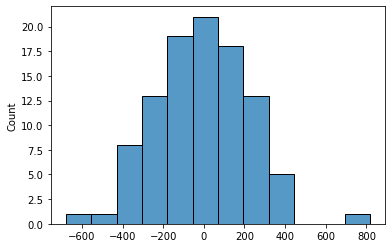

In [138]:
sns.histplot(y)

Fitting Model LinearRegression


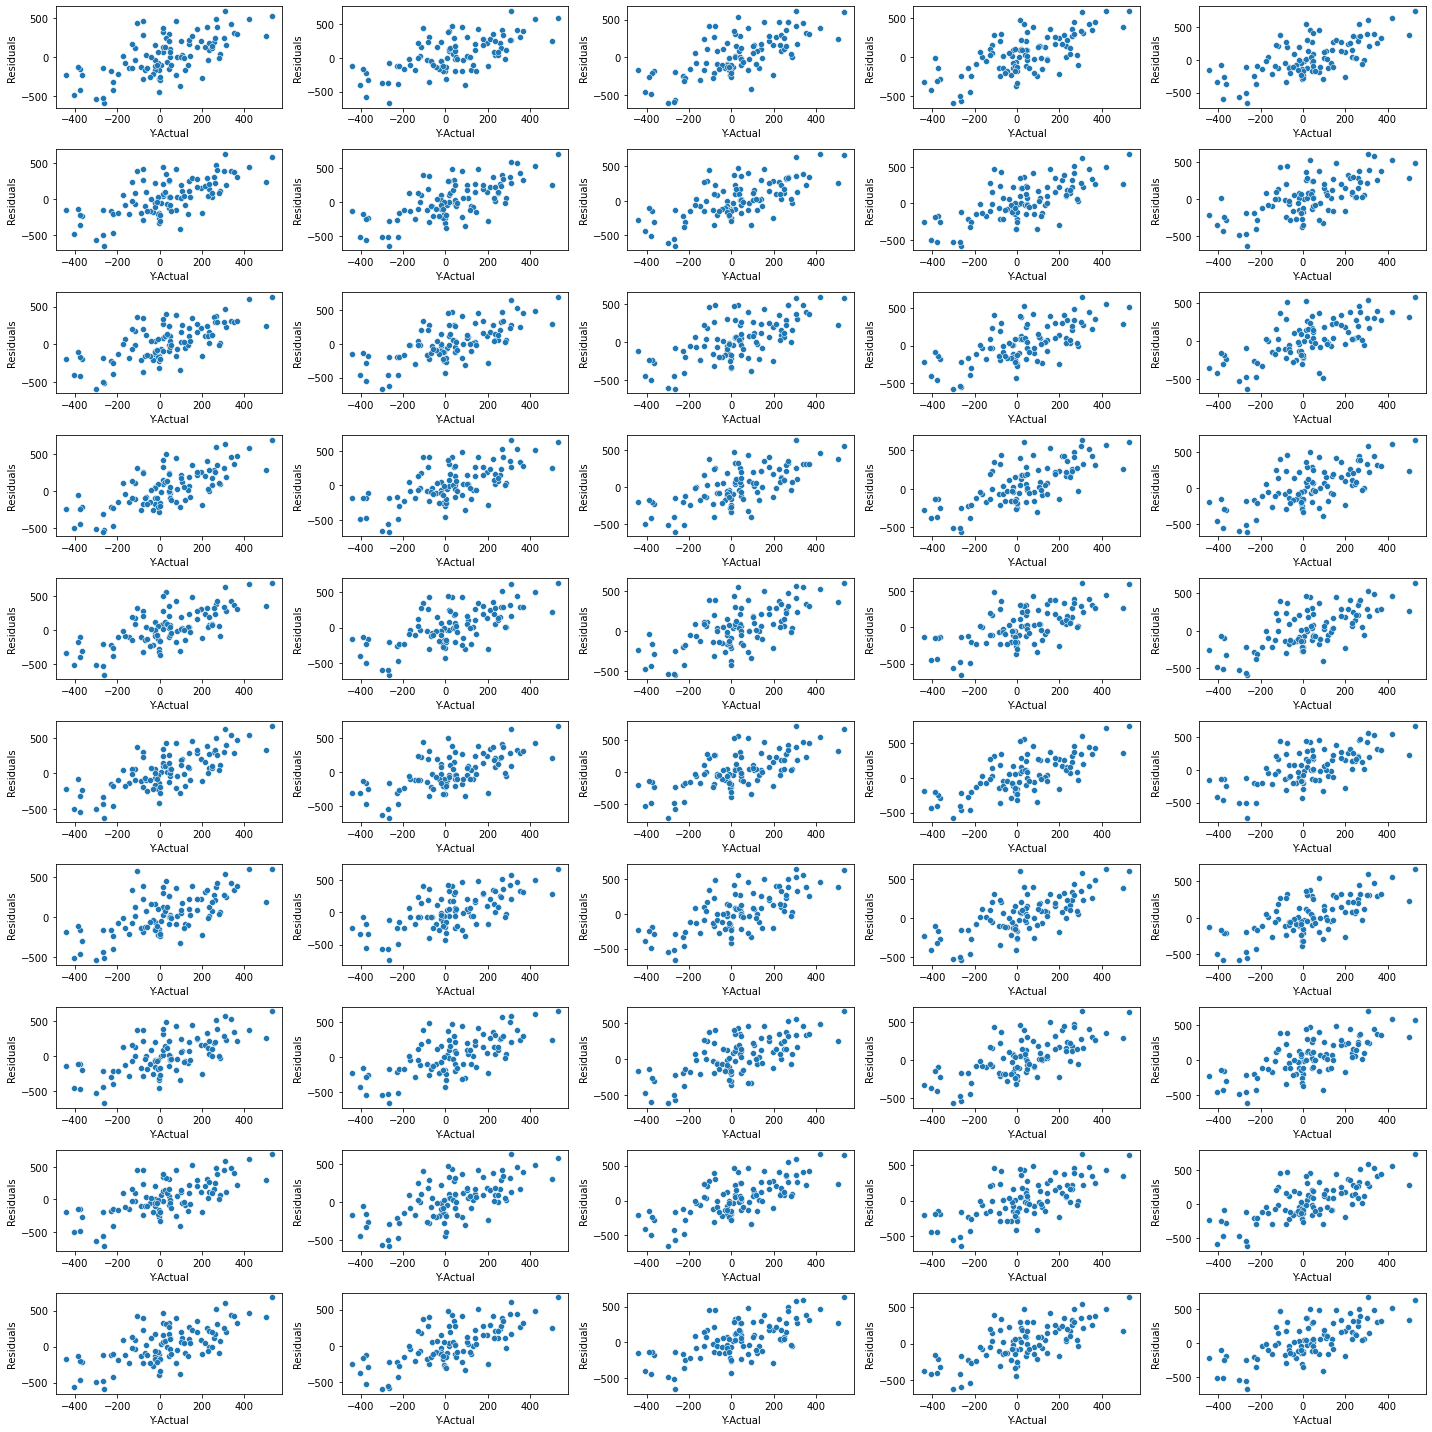

Fitting Model Ridge_aplpha_.25


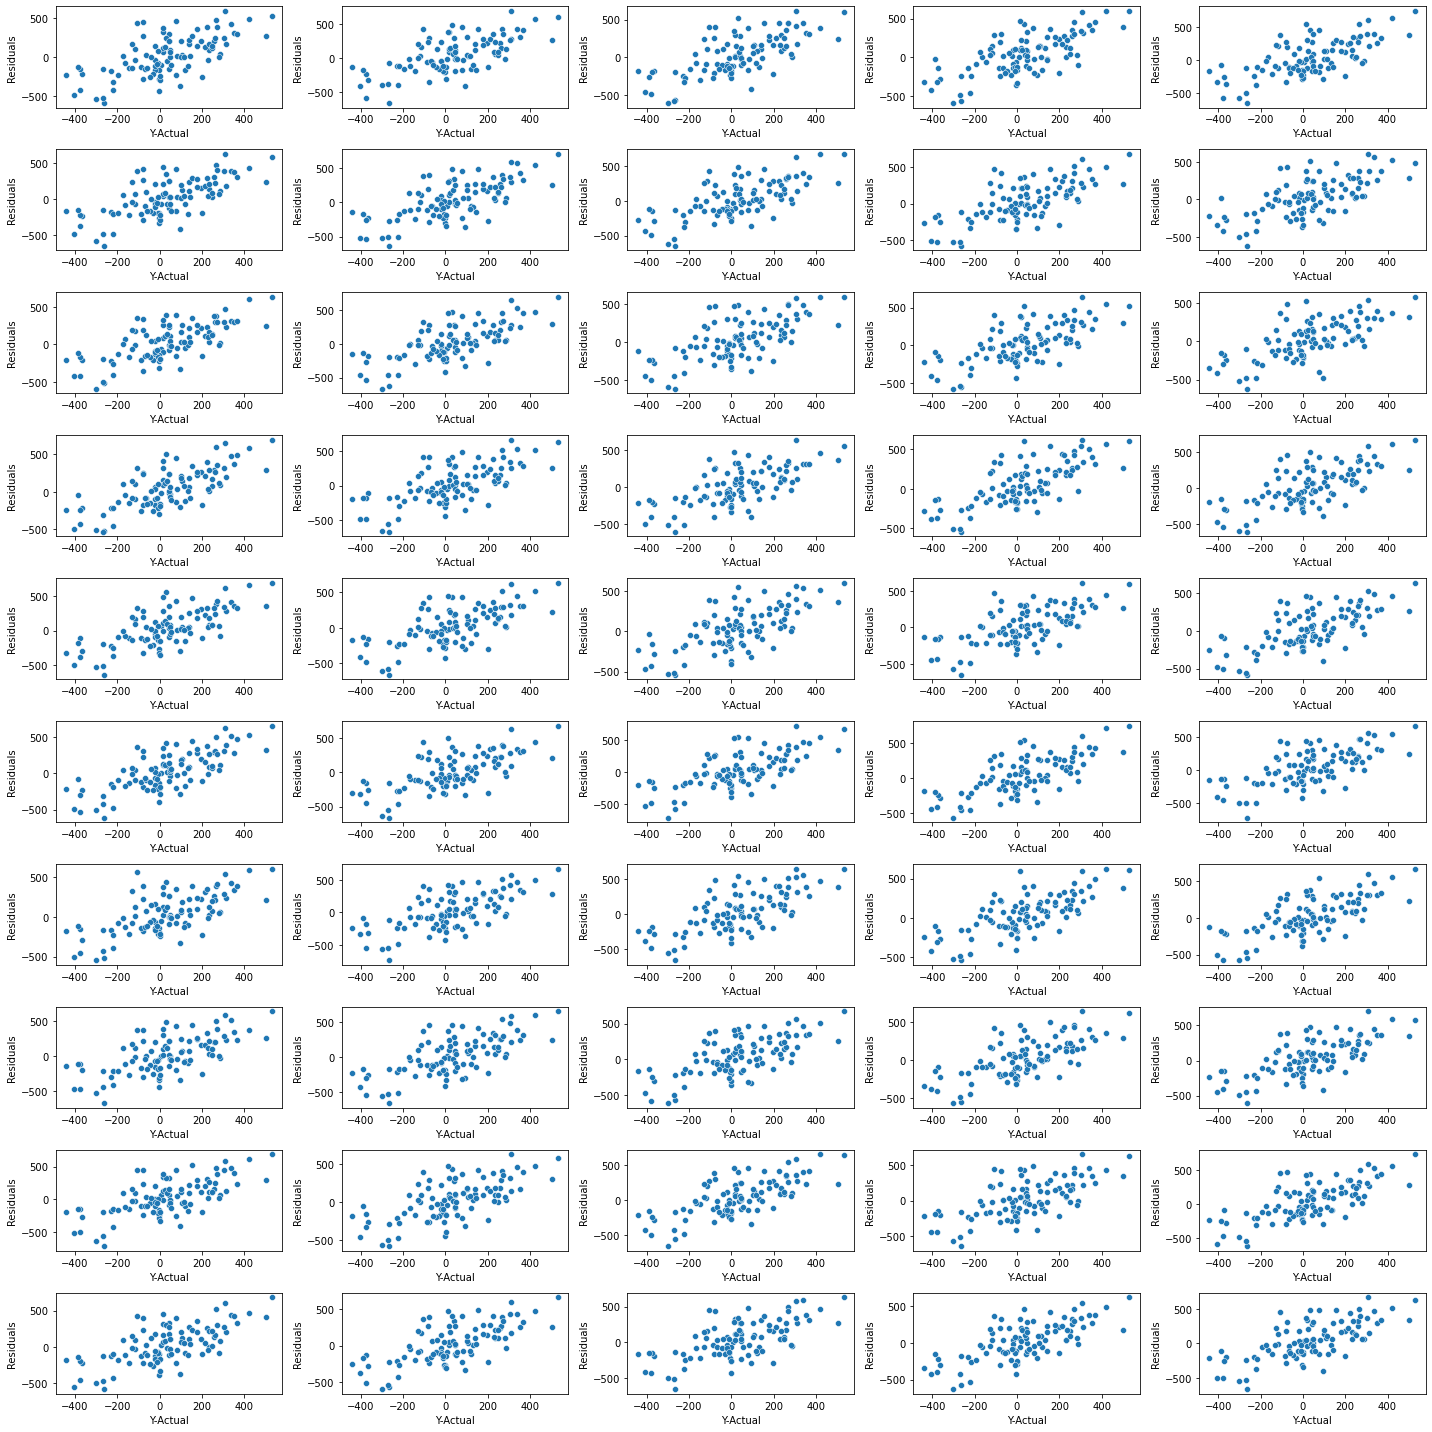

Fitting Model Ridge_aplpha_.5


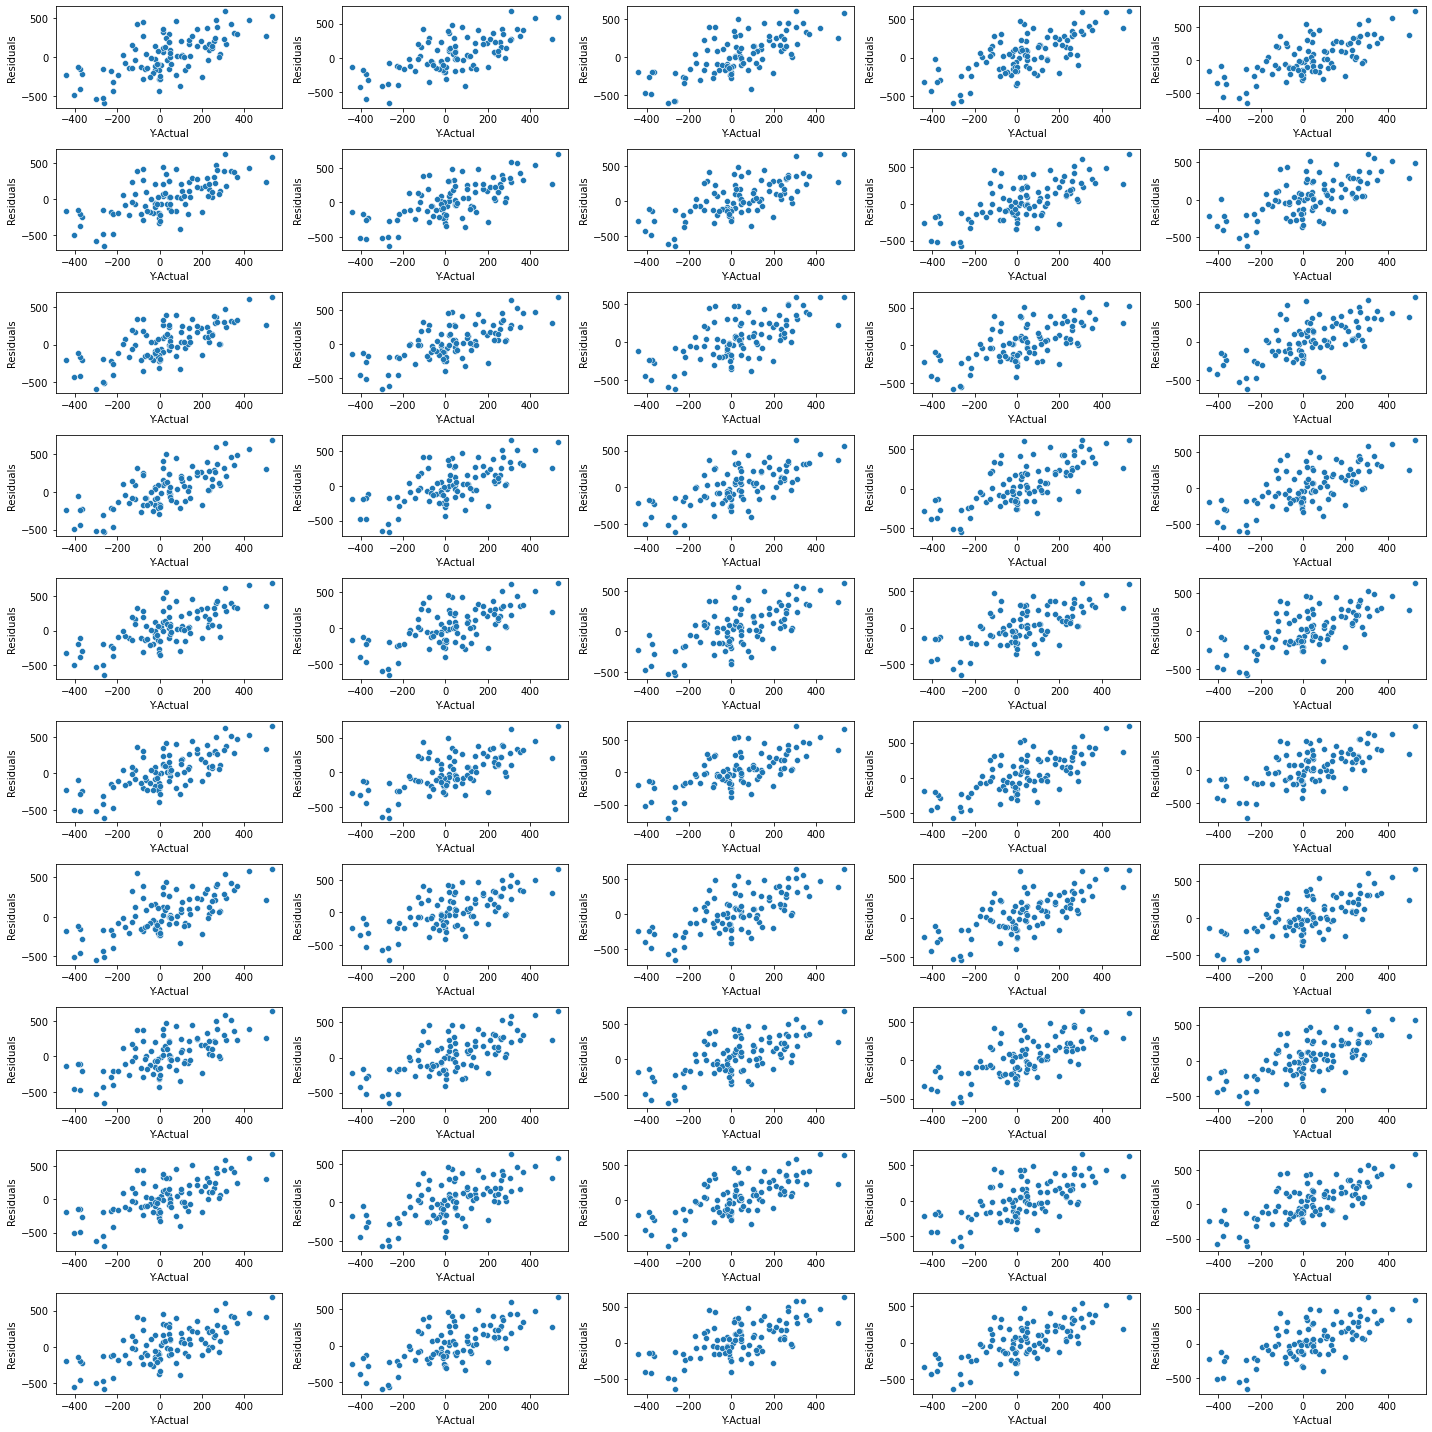

Fitting Model Ridge_aplpha_.75


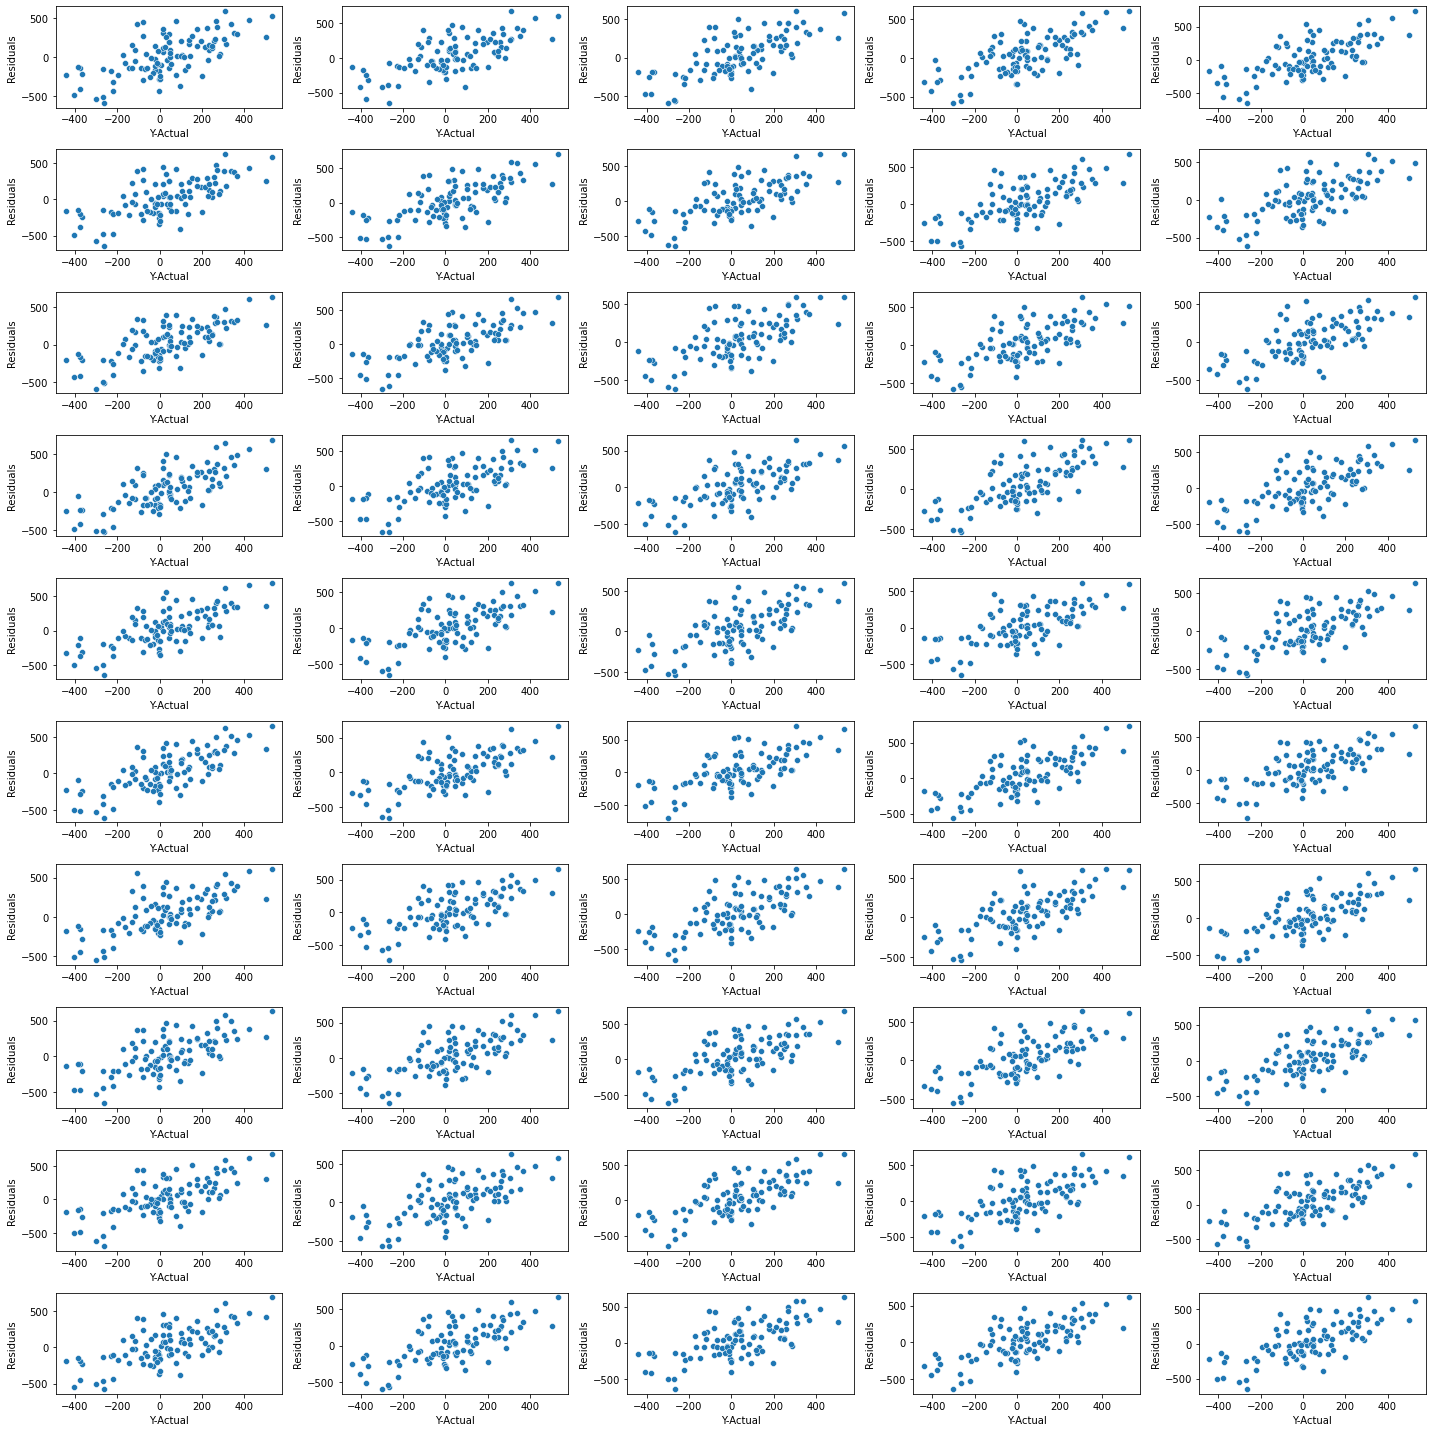

Fitting Model Ridge_aplpha_1


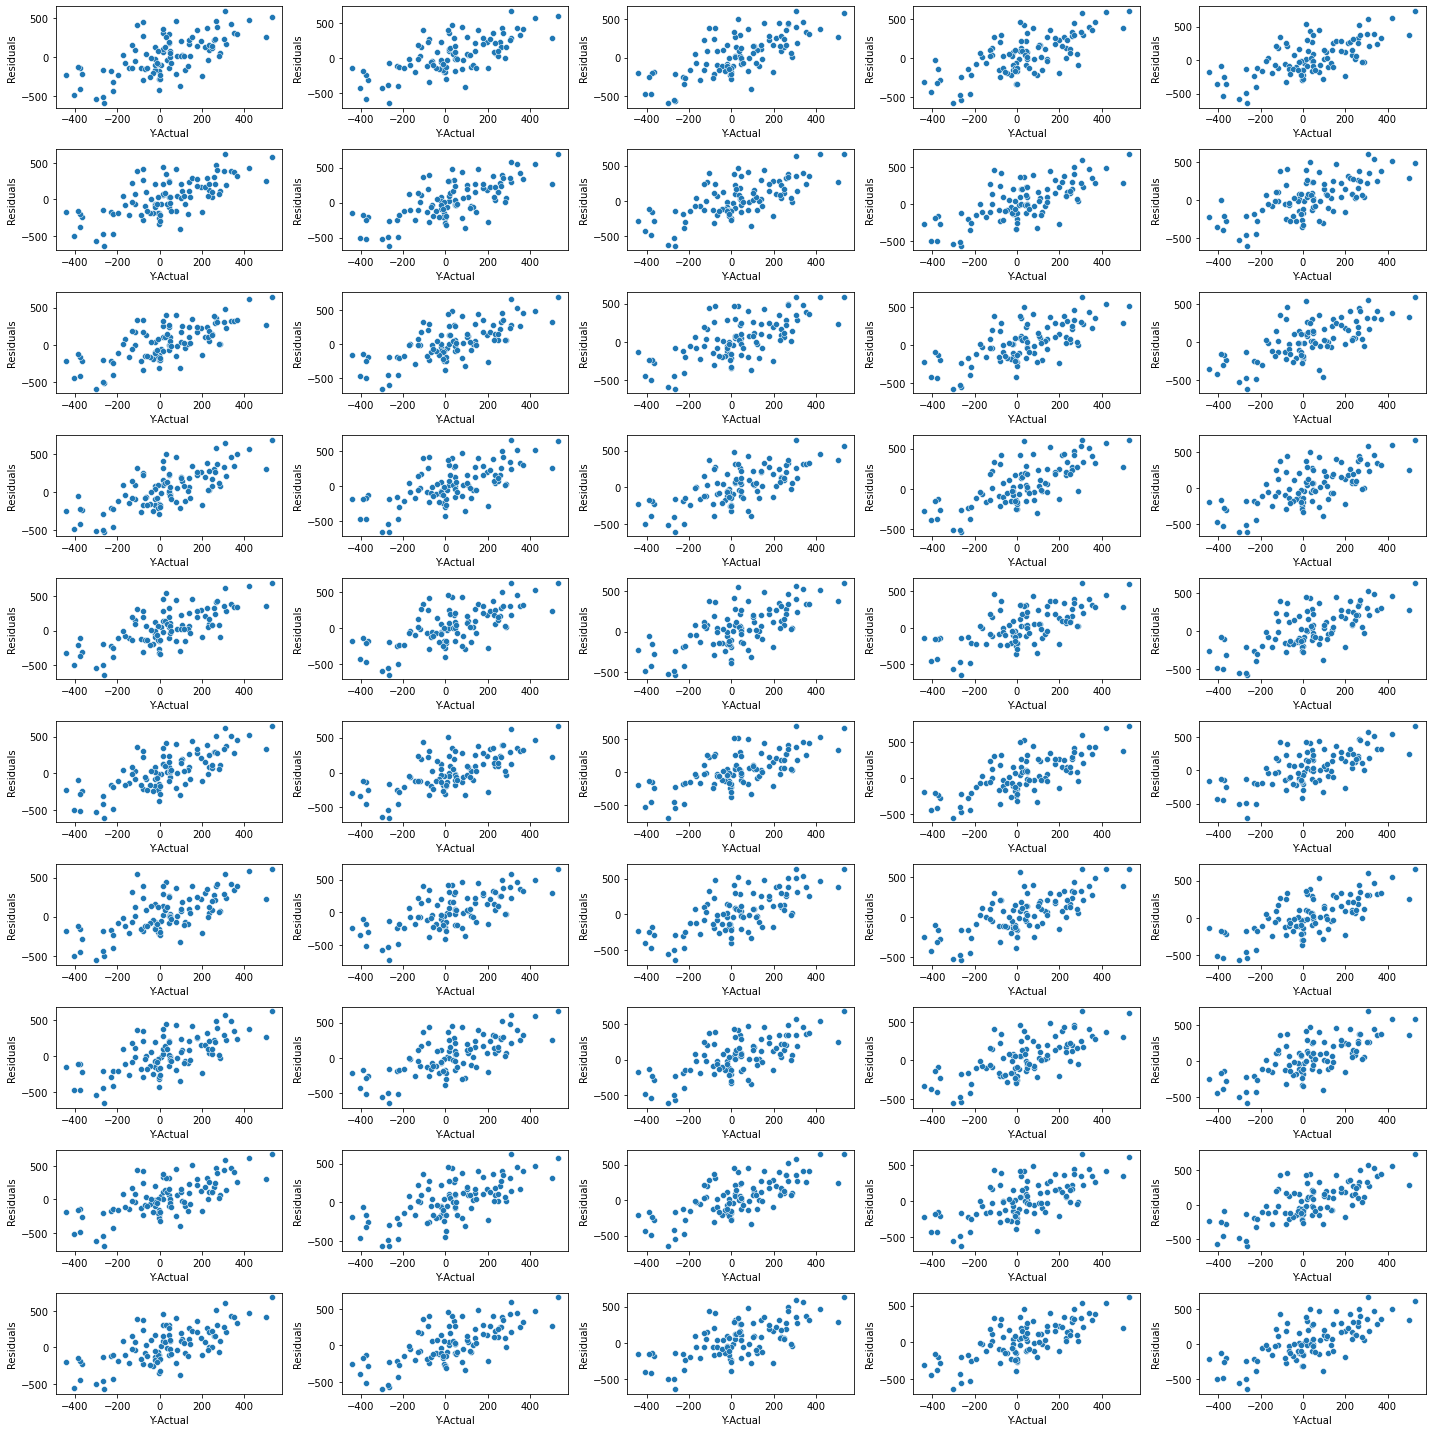

Fitting Model Lasso_alpha_.25


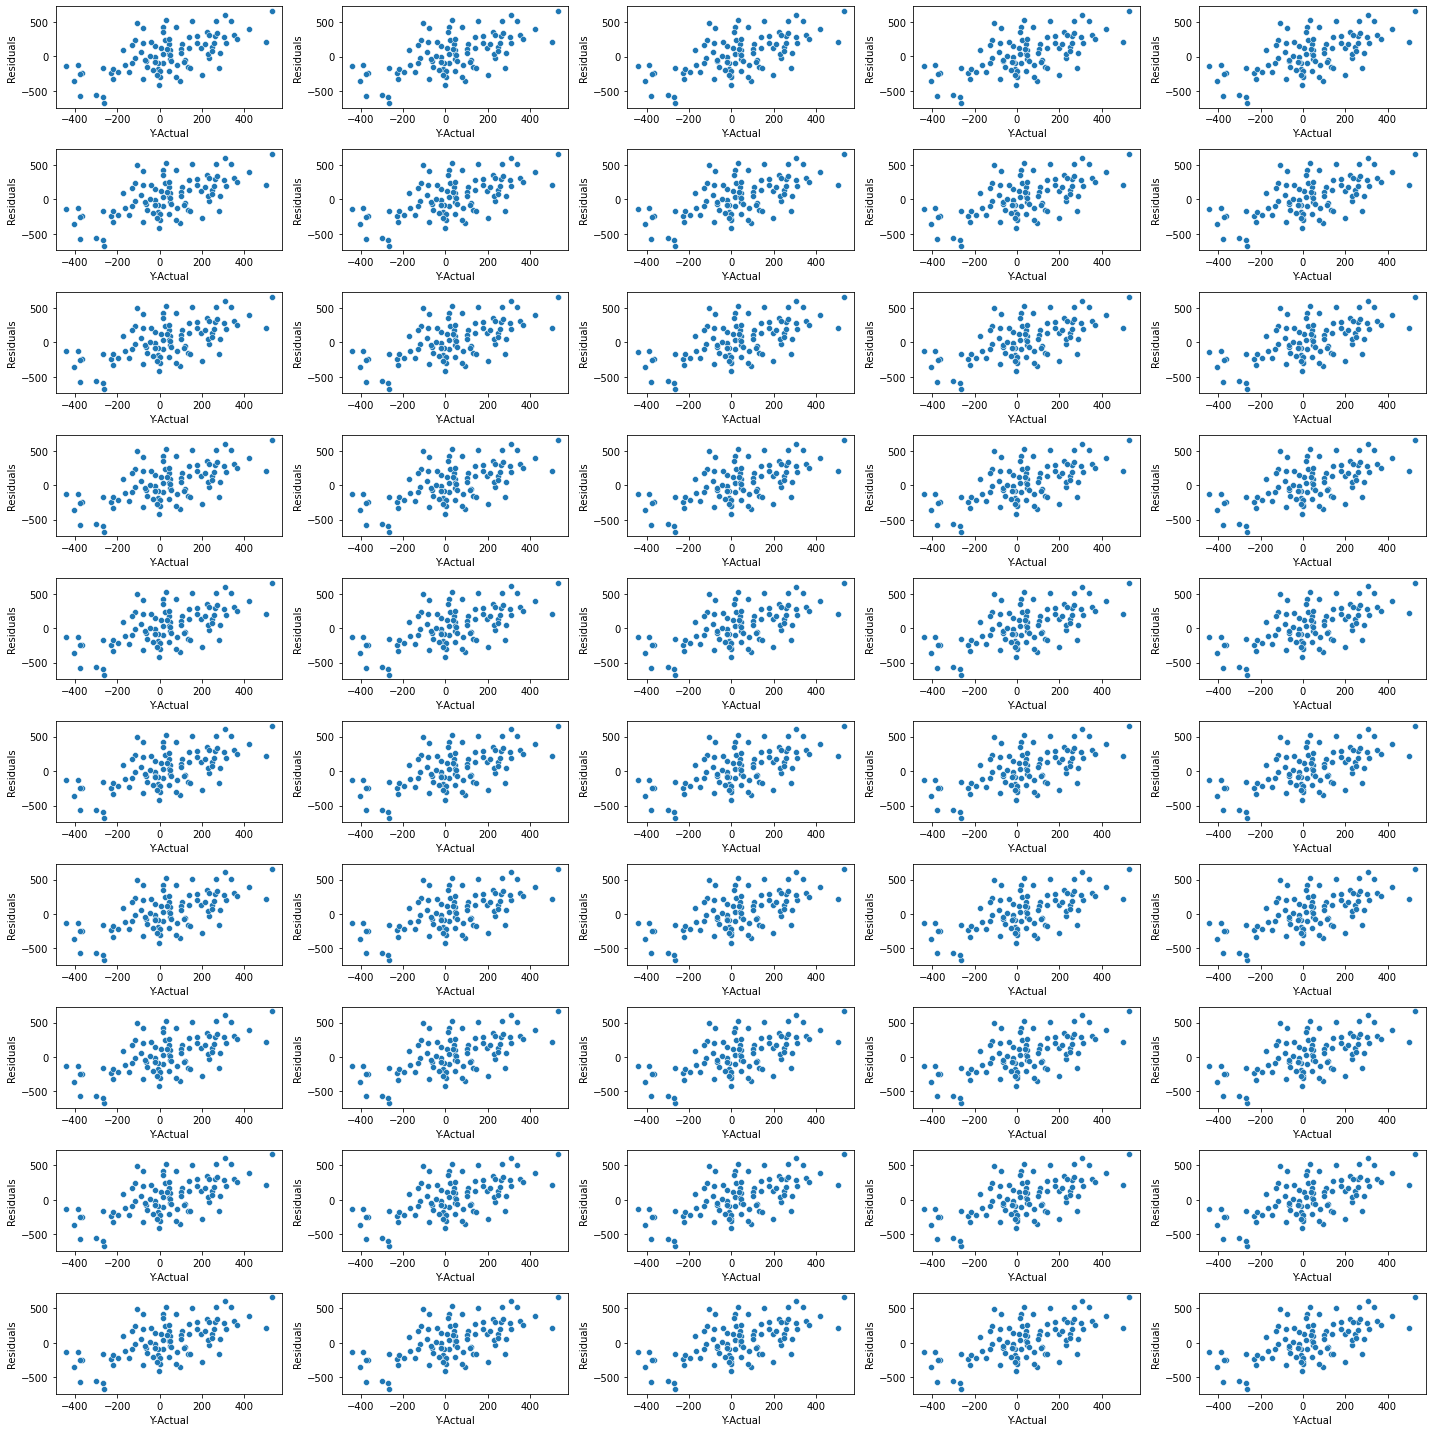

Fitting Model Lasso_alpha_.5


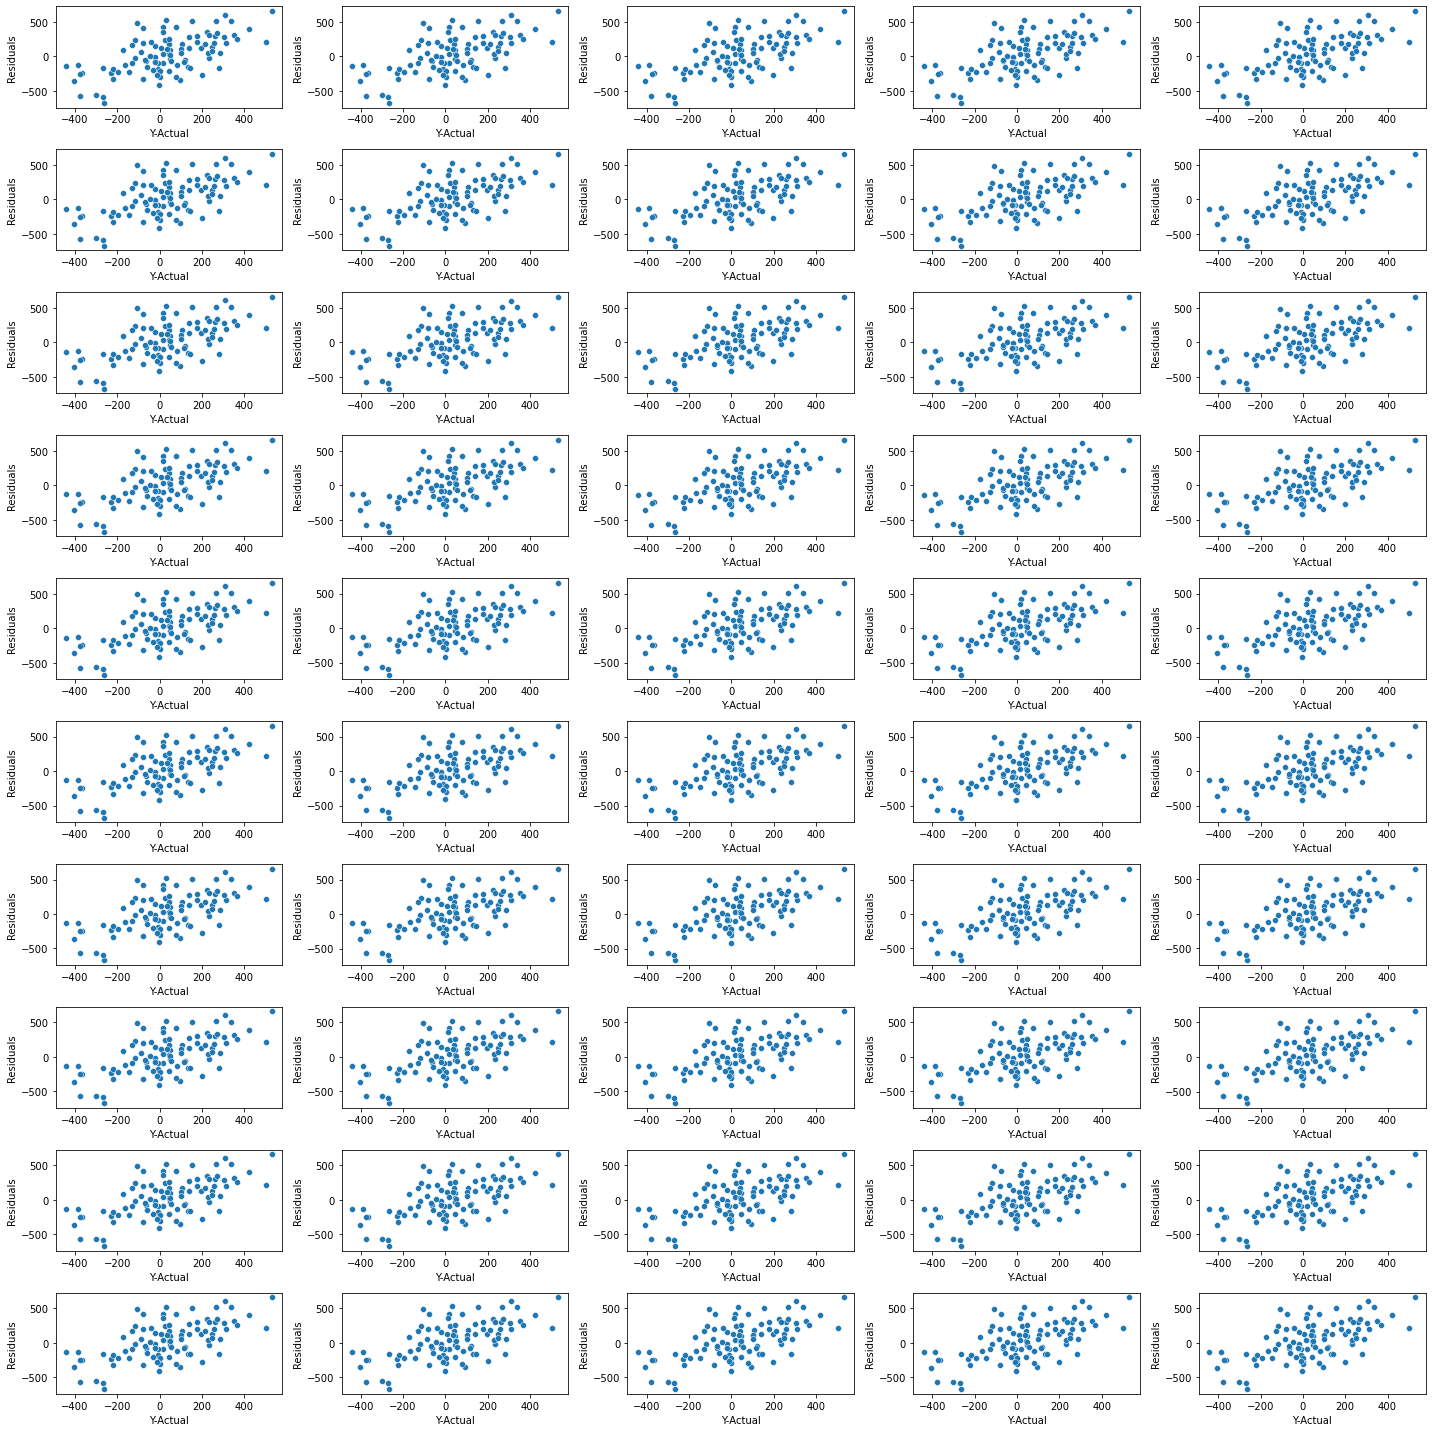

Fitting Model Lasso_alpha_.75


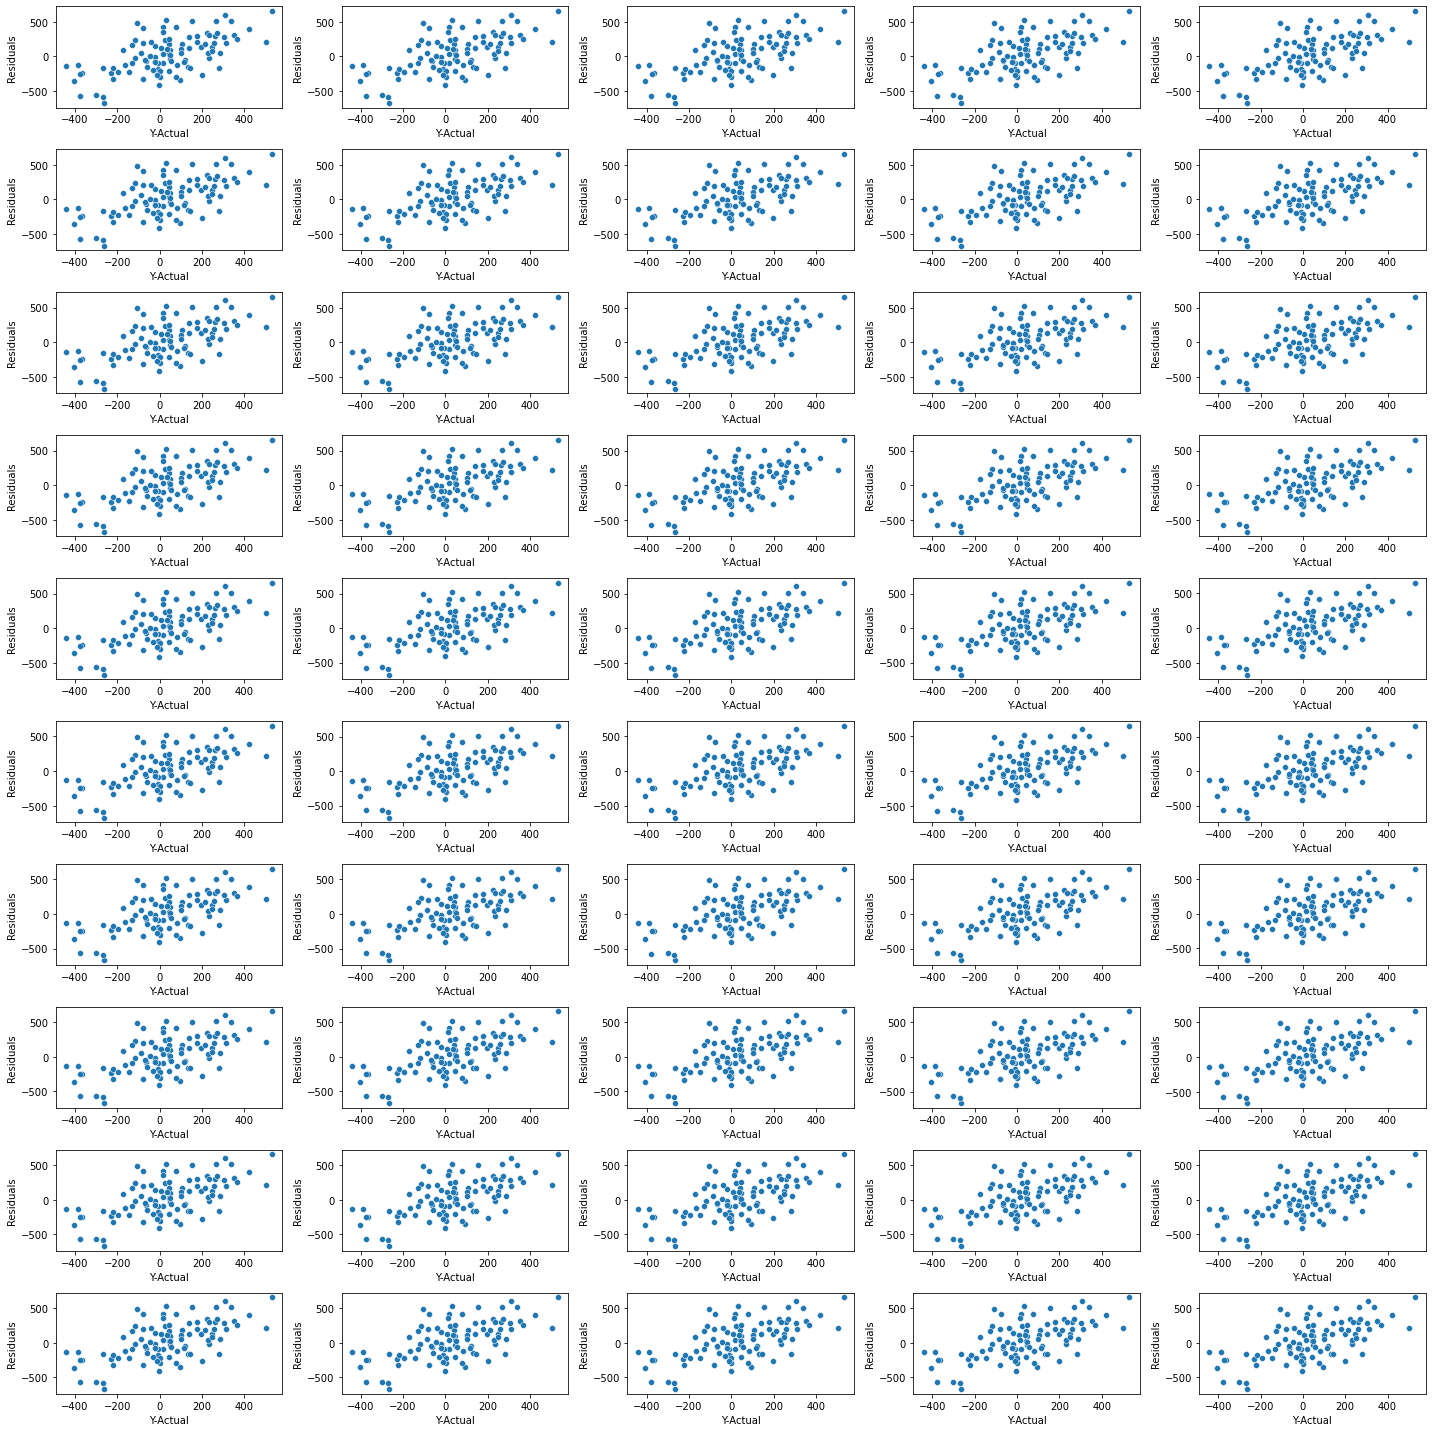

Fitting Model Lasso_alpha_1


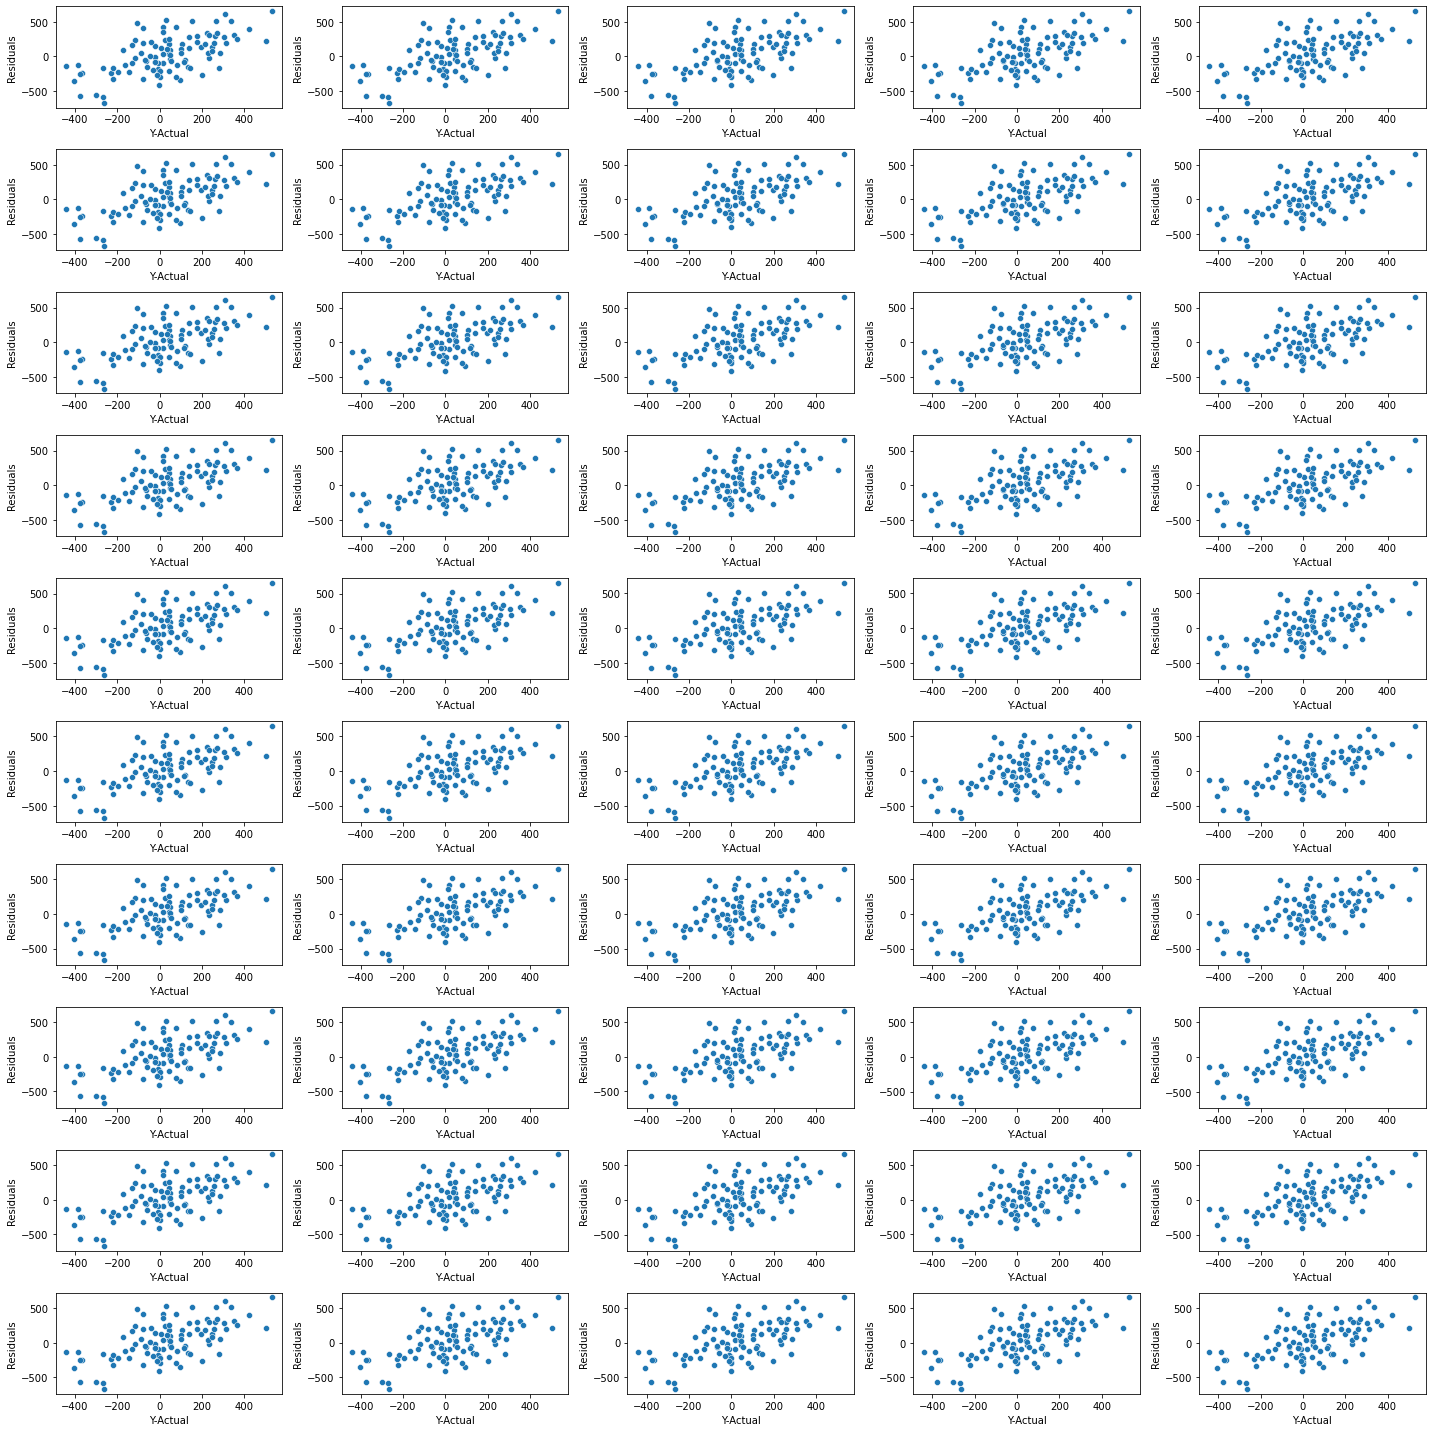

In [139]:
dfs = []
for modelname, model in models.items():
    print(f"Fitting Model {modelname}")
    
    scoring = fit_algo(model, 
                       X, 
                       y, 
                       loss_metrics)
    df = pd.DataFrame(scoring)
    dfs.append(df)


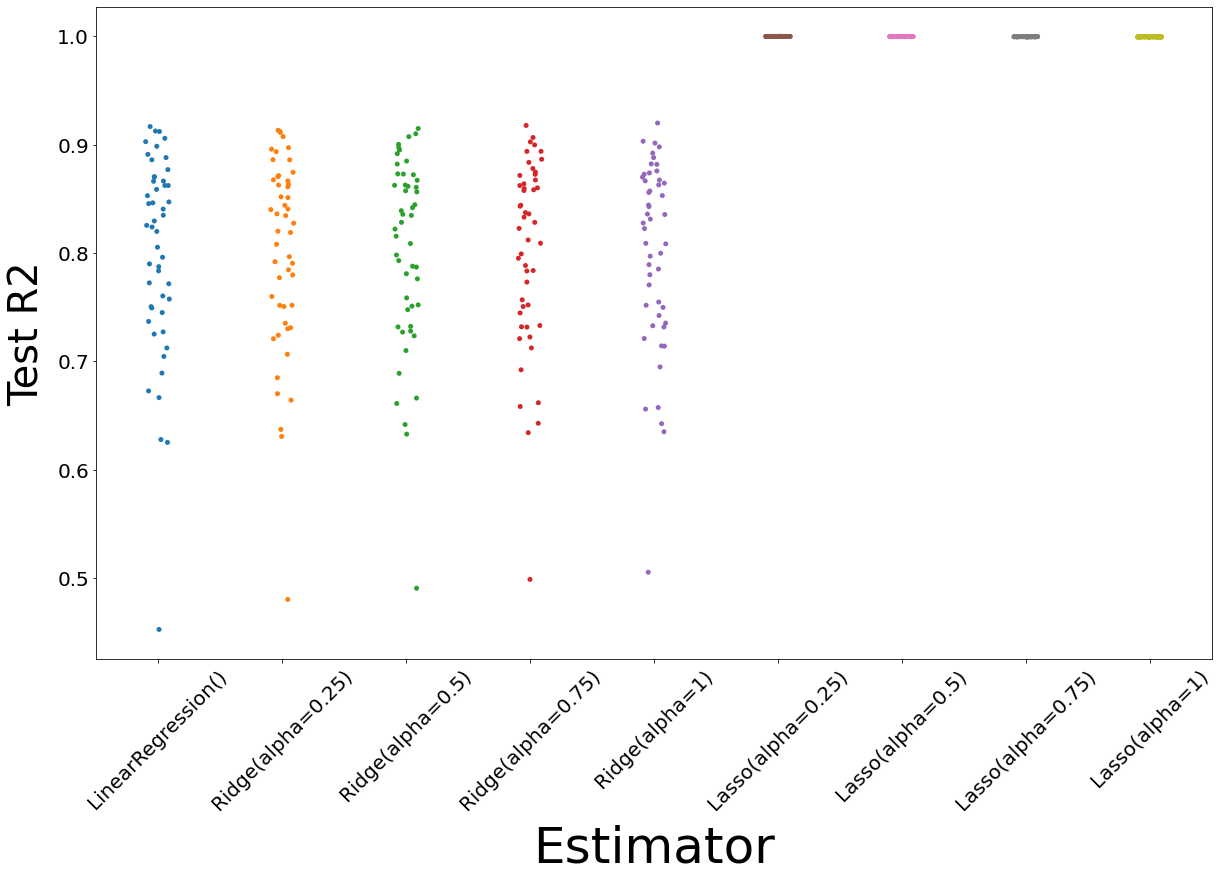

In [150]:
metric_df = pd.concat(dfs)
metric_df['estimator'] = metric_df['estimator'].astype(str)

fig, ax = plt.subplots(figsize=(20,12))
sns.stripplot(data=metric_df,x='estimator',y='test_r2',dodge=True)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20,rotation=45)
plt.xlabel(ax.get_xlabel().title(),fontsize=50,labelpad=10)
plt.ylabel(' '.join(str(ax.get_ylabel()).split("_")).title(),fontsize=40,labelpad=10)
plt.show()

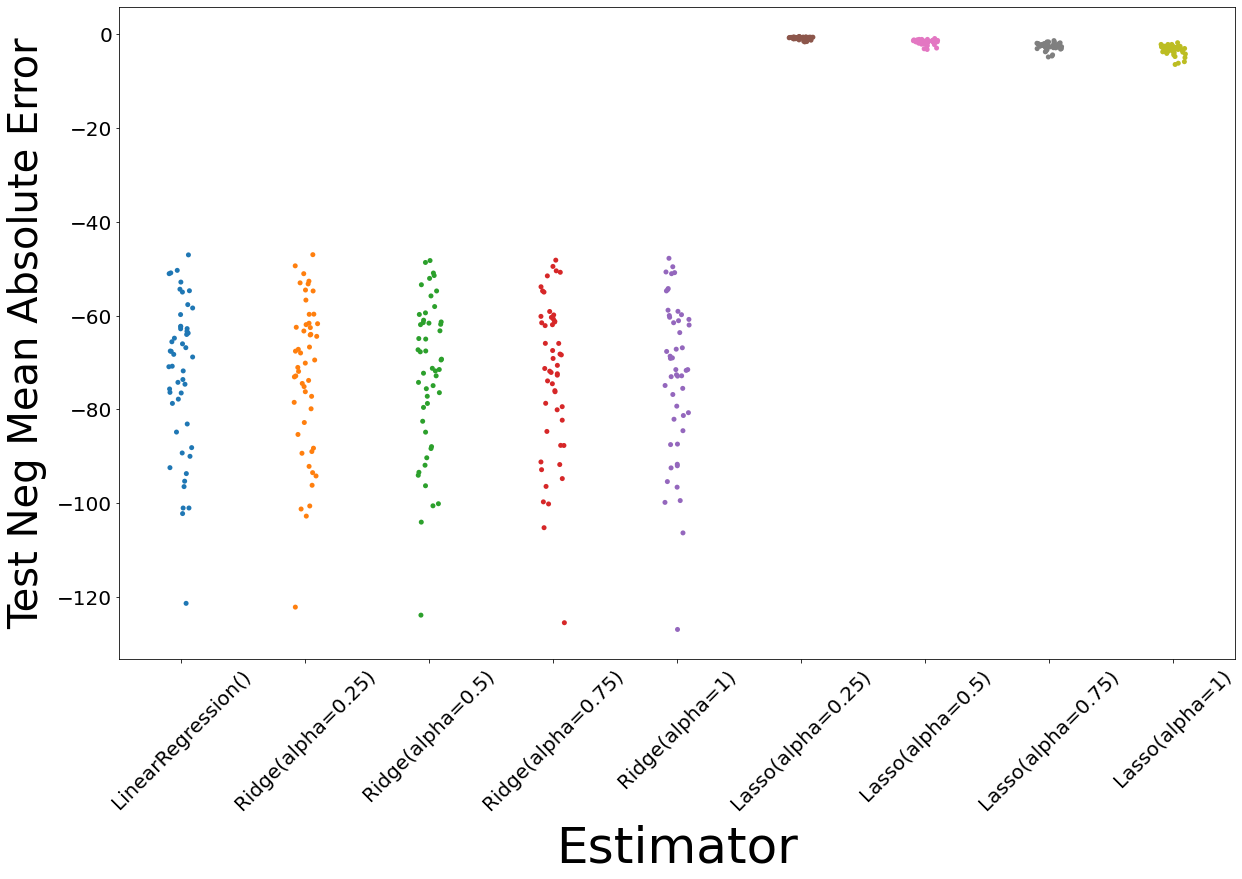

In [149]:
fig, ax = plt.subplots(figsize=(20,12))
sns.stripplot(data=metric_df,x='estimator',y='test_neg_mean_absolute_error',dodge=True)
plt.yticks(fontsize=20)
plt.xticks(fontsize=20,rotation=45)
plt.xlabel(ax.get_xlabel().title(),fontsize=50,labelpad=10)
plt.ylabel(' '.join(str(ax.get_ylabel()).split("_")).title(),fontsize=40,labelpad=10)
plt.show()